In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob

plt.style.use("seaborn-poster")

In [2]:
n = 10000
Days_list = (-3,-2,-1,0)
init=1

path = "results/"+str(n)+"allpc_days_"
df = pd.DataFrame()

for days in ("-3","-2","-1","0"):
    for detect in ("0.1","0.3","0.5"):
        for gens in ("1","2"):
            for file in glob.glob(path+"*"+days+"init_1_detect"+"*"+detect+"_gens"+"*"+gens+".csv"):
                temp = pd.read_csv(file)
                temp['detect'] = float(detect)
                temp['N_Gens'] = float(gens)
                df = df.append(temp)
df.pc = ["$%s$" % x for x in df.pc]

df.head()

#df.N_Gens.unique()


,DAYS,actual_gen_times_mean,avg_daily_growth_rate,cases,die_out,pc,secondary_cases_25,secondary_cases_75,secondary_cases_mean,sim,detect,N_Gens
0,-3.0,3.484063,1.033235,16,True,$1.0$,0.0,0.0,1.129515,0,0.1,1.0
1,-3.0,3.484063,1.000000,6,True,$1.0$,0.0,0.0,1.129515,1,0.1,1.0
2,-3.0,3.484063,1.013607,9,True,$1.0$,0.0,0.0,1.129515,2,0.1,1.0
3,-3.0,3.484063,1.204788,1605,False,$1.0$,0.0,0.0,1.129515,3,0.1,1.0
4,-3.0,3.484063,1.000000,6,True,$1.0$,0.0,0.0,1.129515,4,0.1,1.0


Text(0.5, 1.0, 'Improvement over -2 days and 1 generation')

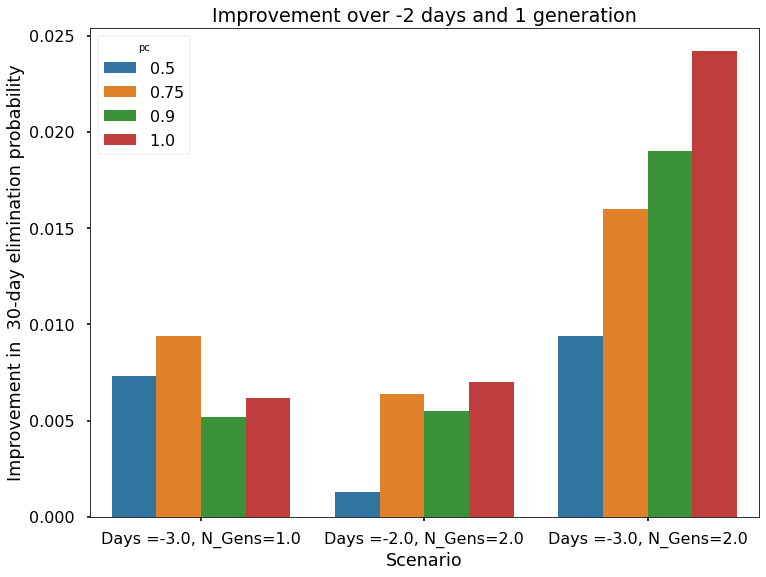

In [17]:
# Plot for detect = 0.3

detect = 0.3

df_plot = df

## Filter to days = -2,-3
day_list = [-1, -0]
df_plot = df_plot[~df_plot.DAYS.isin(day_list)]

# Filter to detect = 0.3
df_plot = df_plot.loc[df_plot.detect==detect]
mean_col = df_plot.groupby(['DAYS','pc','N_Gens']).die_out.mean().reset_index()
mean_col = mean_col.sort_values(by=['N_Gens'],ascending=False)

# Baseline information
mean_col_baseline = mean_col.loc[mean_col.DAYS==-2]
mean_col_baseline = mean_col_baseline.loc[mean_col_baseline.N_Gens==1]
baseline_probs = mean_col_baseline['die_out']
baseline_probs = [baseline_probs]*4
baseline_probs_flat = []
for sublist in baseline_probs:
    for item in sublist:
        baseline_probs_flat.append(item)
        
# Add baseline to data frame
mean_col['Baseline'] = baseline_probs_flat
#print(mean_col)

# Calculate difference between basline 
mean_col['Improvement'] = mean_col['die_out'] - mean_col['Baseline']
#print(mean_col)

mean_col["Scenario"] = 'Days =' +  mean_col["DAYS"].astype(str) + ', N_Gens=' + mean_col["N_Gens"].astype(str)
#print(mean_col)


mean_col = mean_col.loc[mean_col.Scenario!='Days =-2.0, N_Gens=1.0']


# Grouped bar plot

fig,ax = plt.subplots(figsize=(12,9))


sns.barplot(x='Scenario',
            order=["Days =-3.0, N_Gens=1.0", "Days =-2.0, N_Gens=2.0", "Days =-3.0, N_Gens=2.0"],
            y='Improvement',
            data=mean_col,
            hue='pc',
            errwidth=0)

ax.set_ylabel("Improvement in  30-day elimination probability")
ax.set_title("Improvement over -2 days and 1 generation")

    DAYS      pc  N_Gens  die_out  Baseline  Improvement
1   -3.0   $0.5$     2.0   0.8372    0.8370       0.0002
3   -3.0  $0.75$     2.0   0.8469    0.8415       0.0054
5   -3.0   $0.9$     2.0   0.8541    0.8411       0.0130
7   -3.0   $1.0$     2.0   0.8628    0.8482       0.0146
9   -2.0   $0.5$     2.0   0.8361    0.8370      -0.0009
11  -2.0  $0.75$     2.0   0.8435    0.8415       0.0020
13  -2.0   $0.9$     2.0   0.8496    0.8411       0.0085
15  -2.0   $1.0$     2.0   0.8536    0.8482       0.0054
0   -3.0   $0.5$     1.0   0.8354    0.8370      -0.0016
2   -3.0  $0.75$     1.0   0.8412    0.8415      -0.0003
4   -3.0   $0.9$     1.0   0.8443    0.8411       0.0032
6   -3.0   $1.0$     1.0   0.8480    0.8482      -0.0002
8   -2.0   $0.5$     1.0   0.8370    0.8370       0.0000
10  -2.0  $0.75$     1.0   0.8415    0.8415       0.0000
12  -2.0   $0.9$     1.0   0.8411    0.8411       0.0000
14  -2.0   $1.0$     1.0   0.8482    0.8482       0.0000
    DAYS      pc  N_Gens  die_o

Text(0.5, 1.0, 'Improvement in  30-day elimination probability over -2 days and 1 generation')

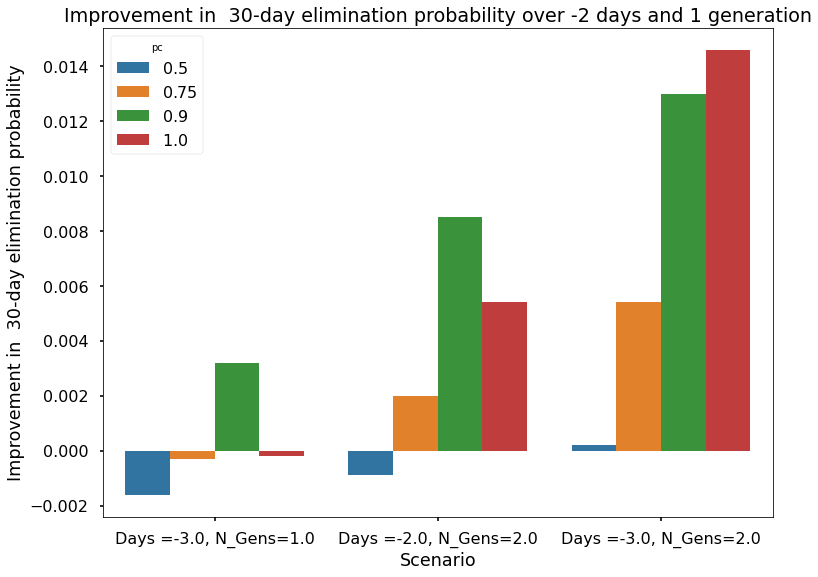

In [15]:
# Plot for detect = 0.1

detect = 0.1

df_plot = df

## Filter to days = -2,-3
day_list = [-1, -0]
df_plot = df_plot[~df_plot.DAYS.isin(day_list)]

# Filter to detect = 0.1
df_plot = df_plot.loc[df_plot.detect==detect]
mean_col = df_plot.groupby(['DAYS','pc','N_Gens']).die_out.mean().reset_index()
mean_col = mean_col.sort_values(by=['N_Gens'],ascending=False)

# Baseline information
mean_col_baseline = mean_col.loc[mean_col.DAYS==-2]
mean_col_baseline = mean_col_baseline.loc[mean_col_baseline.N_Gens==1]
baseline_probs = mean_col_baseline['die_out']
baseline_probs = [baseline_probs]*4
baseline_probs_flat = []
for sublist in baseline_probs:
    for item in sublist:
        baseline_probs_flat.append(item)
        
# Add baseline to data frame
mean_col['Baseline'] = baseline_probs_flat
#print(mean_col)

# Calculate difference between basline 
mean_col['Improvement'] = mean_col['die_out'] - mean_col['Baseline']
print(mean_col)


mean_col["Scenario"] = 'Days =' +  mean_col["DAYS"].astype(str) + ', N_Gens=' + mean_col["N_Gens"].astype(str)
print(mean_col)

mean_col = mean_col.loc[mean_col.Scenario!='Days =-2.0, N_Gens=1.0']


# Grouped bar plot

fig,ax = plt.subplots(figsize=(12,9))


sns.barplot(x='Scenario',
            order=["Days =-3.0, N_Gens=1.0", "Days =-2.0, N_Gens=2.0", "Days =-3.0, N_Gens=2.0"],
            y='Improvement',
            data=mean_col,
            hue='pc',
            errwidth=0)

ax.set_ylabel("Improvement in  30-day elimination probability")
ax.set_title("Improvement in  30-day elimination probability over -2 days and 1 generation")
